In [1]:
import pandas as pd
# from ete3 import NCBITaxa
from ete3 import NCBITaxa, TreeStyle, NodeStyle, faces, AttrFace
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
from scipy.stats import spearmanr

In [2]:
ncbi = NCBITaxa()

In [3]:
df = pd.read_csv('./data_megaplantf.csv')
df["species"] = df["species"].str.replace("_", " ", regex=False)
df.head()

,family,id_clean,species,family_id,true_label,prediction,correct
0,Dof,XP_009624330.1,Nicotiana tomentosiformis,1,1,1,1
1,Dof,Csa10g022470.1,Camelina sativa,1,1,1,1
2,Dof,C.cajan_17965,Cajanus cajan,1,1,1,1
3,Dof,EPS59263.1,Genlisea aurea,1,1,1,1
4,Dof,WALNUT_00012687-RA,Juglans regia,1,1,1,1


In [4]:
species_list = df["species"].unique().tolist()

In [5]:
name2taxid = {}
for sp in species_list:
    try:
        taxid = ncbi.get_name_translator([sp])[sp][0]
        name2taxid[sp] = taxid
    except KeyError:
        print(f"⚠️ Species not found: {sp}")


⚠️ Species not found: Chlorella variabilis NC64A
⚠️ Species not found: Micromonas sp. RCC299


In [6]:
df = df[~df["species"].isin(["Chlorella variabilis NC64A", "Micromonas sp. RCC299"])]

In [7]:
tree = ncbi.get_topology(list(name2taxid.values()))
tree.ladderize()

164

In [8]:
# Translate TaxIDs → species names
taxid_to_name = ncbi.get_taxid_translator(list(name2taxid.values()))
for node in tree.traverse():
    if node.is_leaf():
        if node.name.isdigit():
            node.name = taxid_to_name.get(int(node.name), f"ID:{node.name}")

In [ ]:
# for node in tree.traverse():
#     if node.is_leaf():
#         # Convert TaxID to species name
#         try:
#             node.name = ncbi.get_taxid_translator([int(node.name)])[int(node.name)]
#         except:
#             pass



# --- Base styling for branches ---
base_style = NodeStyle()
base_style["fgcolor"] = "#566573"
base_style["size"] = 0
base_style["vt_line_width"] = 2
base_style["hz_line_width"] = 2
base_style["vt_line_color"] = "#566573"
base_style["hz_line_color"] = "#566573"
for node in tree.traverse():
    node.set_style(base_style)

# --- Custom layout for leaf labels ---
def layout(node):
    if node.is_leaf():
        face = AttrFace("name", fsize=10, fgcolor="#154360", ftype="Arial")
        faces.add_face_to_node(face, node, column=0, position="branch-right")

# --- TreeStyle configuration (circular layout) ---
ts = TreeStyle()
ts.mode = "c"  # <-- CIRCULAR layout
ts.arc_start = -180  # start angle
ts.arc_span = 360    # full circle
ts.show_leaf_name = False
ts.show_branch_support = False
ts.layout_fn = layout
ts.optimal_scale_level = "full"
ts.title.add_face(faces.TextFace("Circular Phylogenetic Tree of Test Species", fsize=14, bold=True), column=0)

# --- Render high-resolution circular tree ---
tree.render(
    "phylogenetic_tree_circular.png",
    w=3000,
    # dpi=1200,
    units="px",
    tree_style=ts,
)


{'nodes': [],
 'faces': [[777.6934496156729,
   1491.244582819197,
   981.986517167743,
   1508.755417180803,
   3,
   'Micromonas pusilla CCMP1545'],
  [778.2319491623283,
   1463.597870944622,
   921.8028693871099,
   1486.5733435969744,
   5,
   'Bathycoccus prasinos'],
  [739.0902227978579,
   1432.9032424507984,
   862.6468427298357,
   1459.7457855514208,
   7,
   'Ostreococcus tauri'],
  [630.2721841002231,
   1391.0124350946992,
   804.7837727615909,
   1428.3224089991695,
   9,
   'Ostreococcus sp. RCC809'],
  [611.3444879325223,
   1354.2923571889191,
   808.7056708047958,
   1401.6694057205168,
   10,
   "Ostreococcus sp. 'lucimarinus'"],
  [703.96179510915,
   1337.345508426833,
   873.4708428534508,
   1386.7638095825896,
   14,
   'Picochlorum sp. SENEW3'],
  [663.2295073045352,
   1296.1298868685594,
   878.9263018276866,
   1362.7214272308968,
   15,
   'Coccomyxa subellipsoidea C-169'],
  [779.3439254563144,
   1294.1553537106238,
   885.2932720990472,
   1338.88052011

: 

In [12]:
tree.render("phylogenetic_tree_2.png", w=800, dpi=1200, units="px")

{'nodes': [[24.778179428195866,
   325.76481483502107,
   31.48209004272101,
   332.4687254495462,
   0,
   None],
  [52.9083141636543,
   147.76536312849166,
   59.612224778179446,
   154.4692737430168,
   1,
   None],
  [81.03844889911275,
   40.64245810055867,
   87.7423595136379,
   47.34636871508381,
   2,
   None],
  [109.16858363457119,
   13.407821229050285,
   115.87249424909633,
   20.111731843575427,
   3,
   None],
  [109.16858363457118,
   67.87709497206706,
   115.87249424909632,
   74.5810055865922,
   4,
   None],
  [137.29871837002963,
   42.45810055865923,
   144.00262898455475,
   49.162011173184375,
   5,
   None],
  [137.2987183700296,
   93.29608938547489,
   144.00262898455475,
   100.00000000000003,
   6,
   None],
  [165.42885310548806,
   71.50837988826818,
   172.1327637200132,
   78.21229050279332,
   7,
   None],
  [165.42885310548806,
   115.0837988826816,
   172.1327637200132,
   121.78770949720675,
   8,
   None],
  [193.55898784094651,
   100.5586592178

In [9]:
tree.show()

AttributeError: '_TreeScene' object has no attribute 'selector'

expected str, bytes or os.PathLike object, not tuple


: 

In [10]:


distances = []

# Iterate over all unique species pairs
for sp1, sp2 in combinations(name2taxid.keys(), 2):
    node1 = tree&str(name2taxid[sp1])
    node2 = tree&str(name2taxid[sp2])
    d = tree.get_distance(node1, node2)
    distances.append({
        "species1": sp1,
        "species2": sp2,
        "distance": d
    })

phylo_df = pd.DataFrame(distances)
print(f"✅ Computed {len(phylo_df)} pairwise distances.")
phylo_df.head()

✅ Computed 13366 pairwise distances.


,species1,species2,distance
0,Nicotiana tomentosiformis,Camelina sativa,12.0
1,Nicotiana tomentosiformis,Cajanus cajan,12.0
2,Nicotiana tomentosiformis,Genlisea aurea,7.0
3,Nicotiana tomentosiformis,Juglans regia,10.0
4,Nicotiana tomentosiformis,Nicotiana sylvestris,2.0


In [11]:
species_accuracy = df.groupby("species")["correct"].mean().reset_index(name="accuracy")
species_accuracy.head()

,species,accuracy
0,Actinidia chinensis,0.995556
1,Aegilops tauschii,0.989474
2,Aethionema arabicum,0.992453
3,Amaranthus hypochondriacus,0.994975
4,Amborella trichopoda,1.000000


In [12]:

merged = phylo_df.merge(
    species_accuracy.rename(columns={"species": "species1"}),
    on="species1",
    how="left"
).merge(
    species_accuracy.rename(columns={"species": "species2", "accuracy": "accuracy2"}),
    on="species2",
    how="left"
)

# Compute absolute accuracy difference between pairs
merged["accuracy_diff"] = abs(merged["accuracy"] - merged["accuracy2"])

rho, pval = spearmanr(merged["distance"], merged["accuracy_diff"])
print(f"Spearman correlation = {rho:.3f}, p = {pval:.4f}")


Spearman correlation = 0.163, p = 0.0000


In [13]:
merged.head()

,species1,species2,distance,accuracy,accuracy2,accuracy_diff
0,Nicotiana tomentosiformis,Camelina sativa,12.0,0.991749,0.990758,0.000991
1,Nicotiana tomentosiformis,Cajanus cajan,12.0,0.991749,0.987212,0.004537
2,Nicotiana tomentosiformis,Genlisea aurea,7.0,0.991749,0.995098,0.003349
3,Nicotiana tomentosiformis,Juglans regia,10.0,0.991749,0.992958,0.001209
4,Nicotiana tomentosiformis,Nicotiana sylvestris,2.0,0.991749,0.988430,0.003319


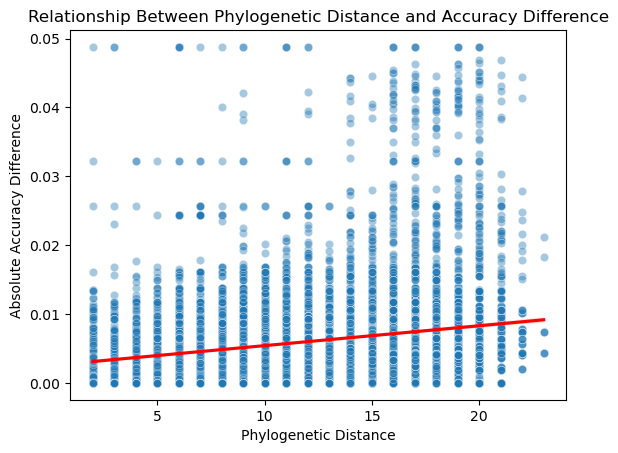

In [14]:


sns.scatterplot(data=merged, x="distance", y="accuracy_diff", alpha=0.4)
sns.regplot(data=merged, x="distance", y="accuracy_diff", scatter=False, color="red")
plt.xlabel("Phylogenetic Distance")
plt.ylabel("Absolute Accuracy Difference")
plt.title("Relationship Between Phylogenetic Distance and Accuracy Difference")
plt.show()


/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


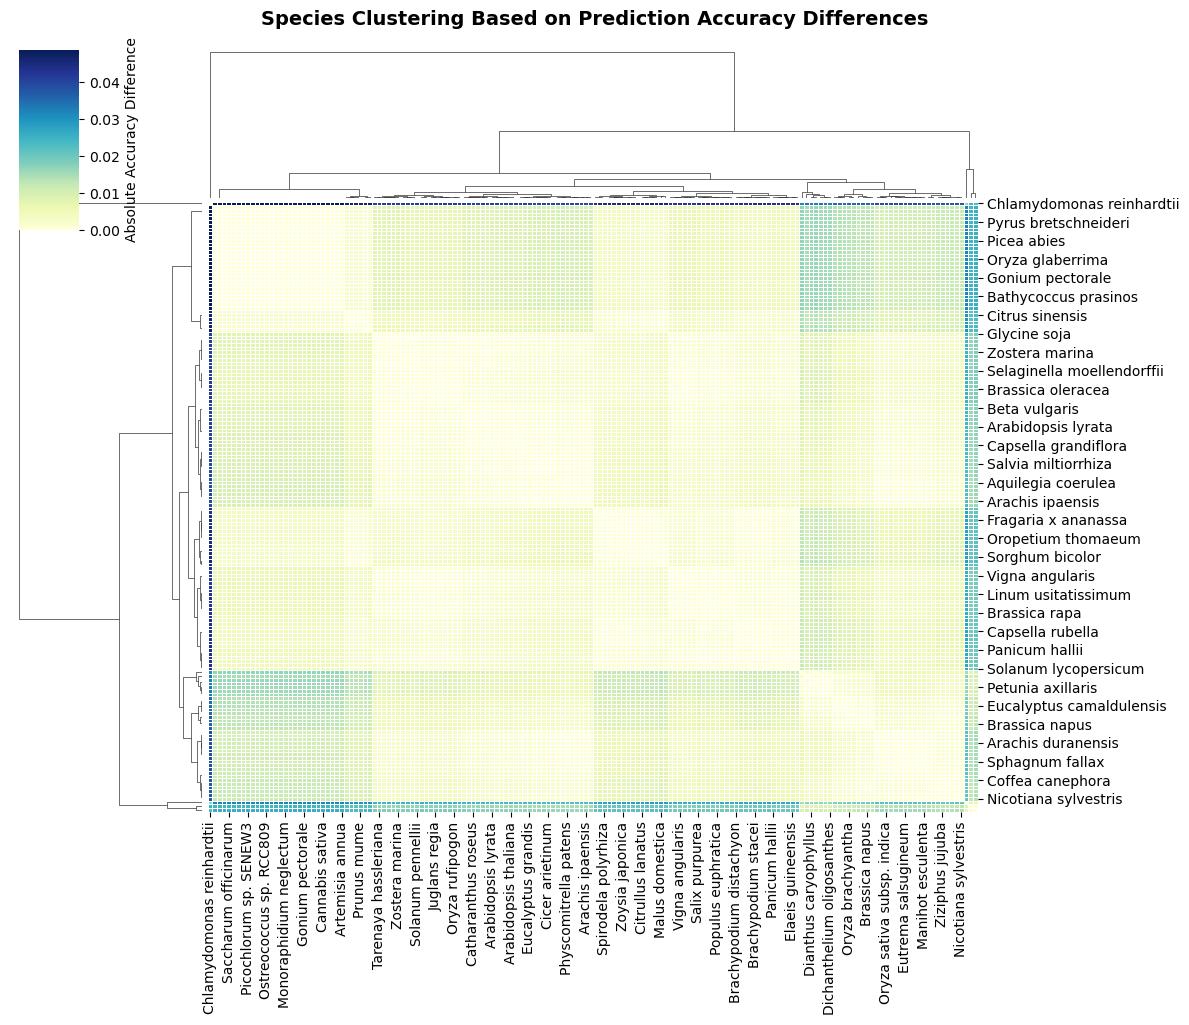

In [15]:
pivot_df = merged.pivot(index="species1", columns="species2", values="accuracy_diff")

# Fill missing cells to make it symmetric
pivot_df = pivot_df.combine_first(pivot_df.T)

# Replace NaN with 0 (self-comparisons)
pivot_df.fillna(0, inplace=True)

# Plot clustered heatmap
sns.clustermap(
    pivot_df,
    cmap="YlGnBu",        # or "coolwarm" for contrast
    figsize=(12, 10),
    linewidths=0.5,
    cbar_kws={'label': 'Absolute Accuracy Difference'},
)

plt.suptitle(
    "Species Clustering Based on Prediction Accuracy Differences",
    fontsize=14,
    weight="bold",
    y=1.02
)
plt.show()

/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


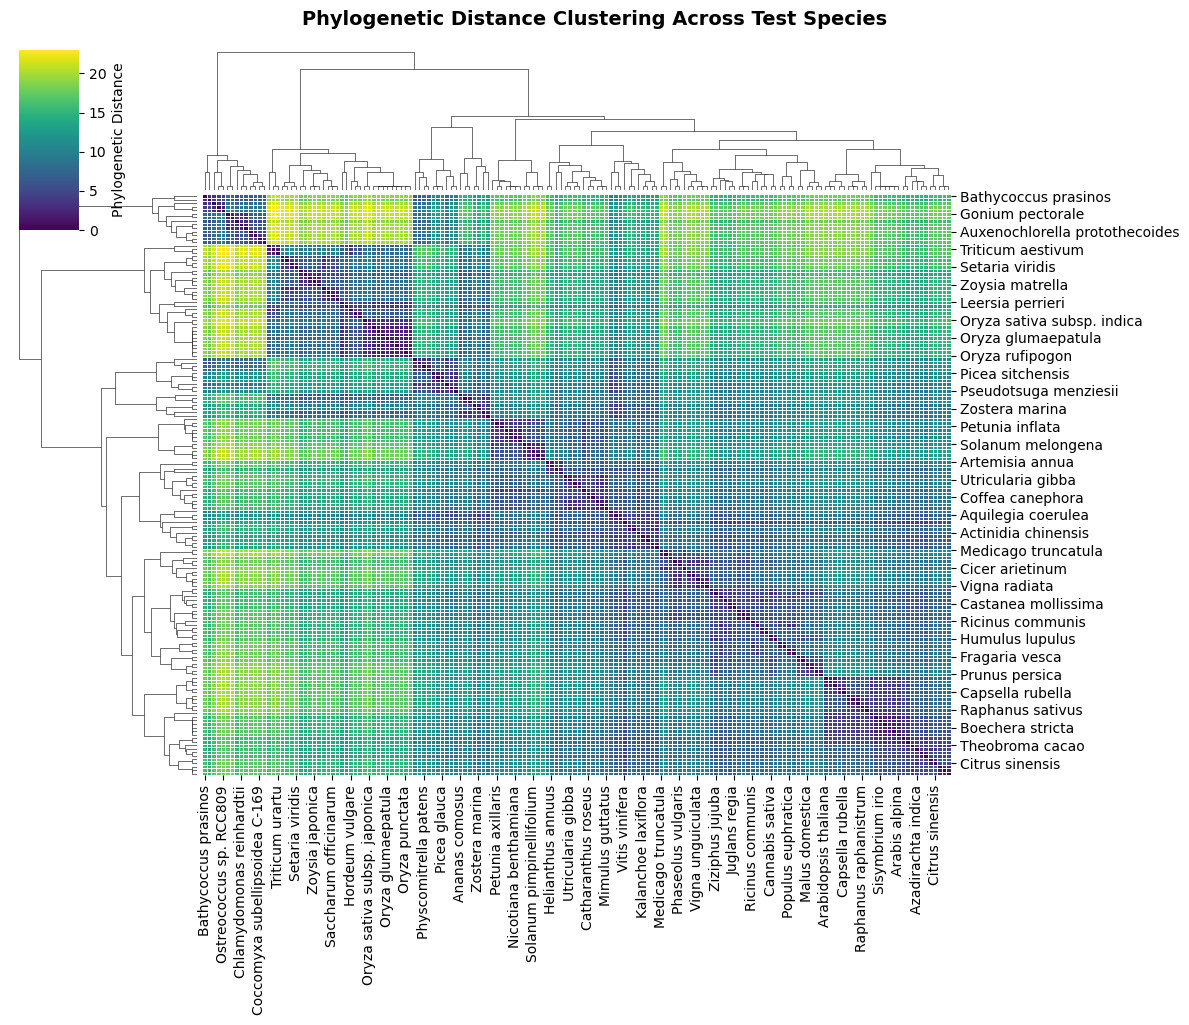

In [16]:
pivot_dist = merged.pivot(index="species1", columns="species2", values="distance")
pivot_dist = pivot_dist.combine_first(pivot_dist.T)
pivot_dist.fillna(0, inplace=True)

sns.clustermap(
    pivot_dist,
    cmap="viridis",
    figsize=(12, 10),
    linewidths=0.5,
    cbar_kws={'label': 'Phylogenetic Distance'}
)
plt.suptitle(
    "Phylogenetic Distance Clustering Across Test Species",
    fontsize=14,
    weight="bold",
    y=1.02
)
plt.show()


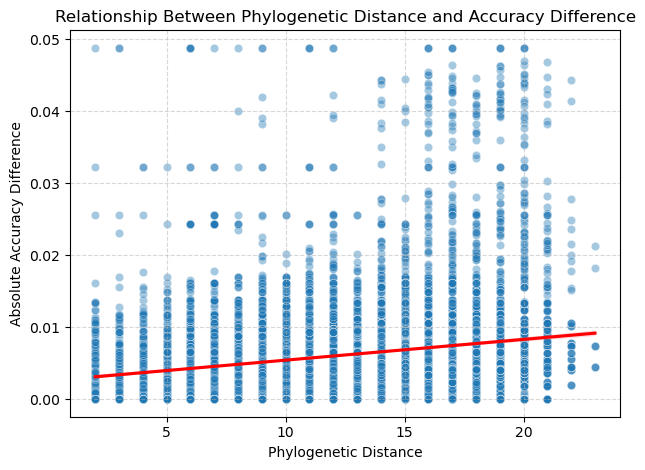

In [17]:
sns.scatterplot(data=merged, x="distance", y="accuracy_diff", alpha=0.4)
sns.regplot(data=merged, x="distance", y="accuracy_diff", scatter=False, color="red")
plt.xlabel("Phylogenetic Distance")
plt.ylabel("Absolute Accuracy Difference")
plt.title("Relationship Between Phylogenetic Distance and Accuracy Difference")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_46696/905313644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = merged.groupby("distance_bin")["accuracy_diff"].mean().reset_index()


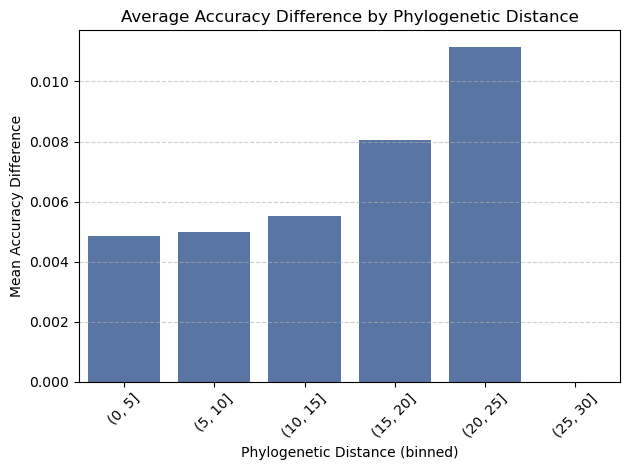

In [18]:
merged["distance_bin"] = pd.cut(merged["distance"], bins=[0,5,10,15,20,25,30])
bin_summary = merged.groupby("distance_bin")["accuracy_diff"].mean().reset_index()

sns.barplot(data=bin_summary, x="distance_bin", y="accuracy_diff", color="#4C72B0")
plt.title("Average Accuracy Difference by Phylogenetic Distance")
plt.xlabel("Phylogenetic Distance (binned)")
plt.ylabel("Mean Accuracy Difference")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/opt/anaconda3/envs/MegaPlantTF/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


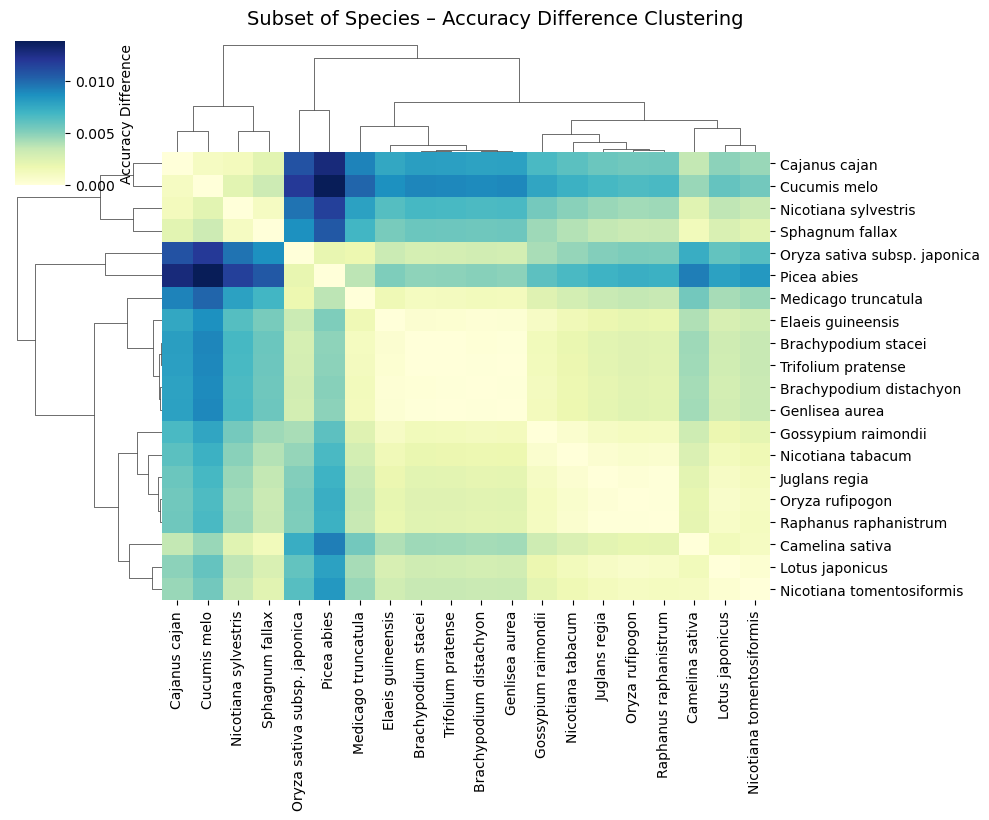

In [19]:
subset_species = merged["species1"].unique()[:20]  # or select manually by plant groups
subset = merged[merged["species1"].isin(subset_species) & merged["species2"].isin(subset_species)]
pivot_subset = subset.pivot(index="species1", columns="species2", values="accuracy_diff")
pivot_subset = pivot_subset.combine_first(pivot_subset.T).fillna(0)

sns.clustermap(pivot_subset, cmap="YlGnBu", figsize=(10,8), cbar_kws={'label': 'Accuracy Difference'})
plt.suptitle("Subset of Species – Accuracy Difference Clustering", fontsize=14, y=1.02)
plt.show()


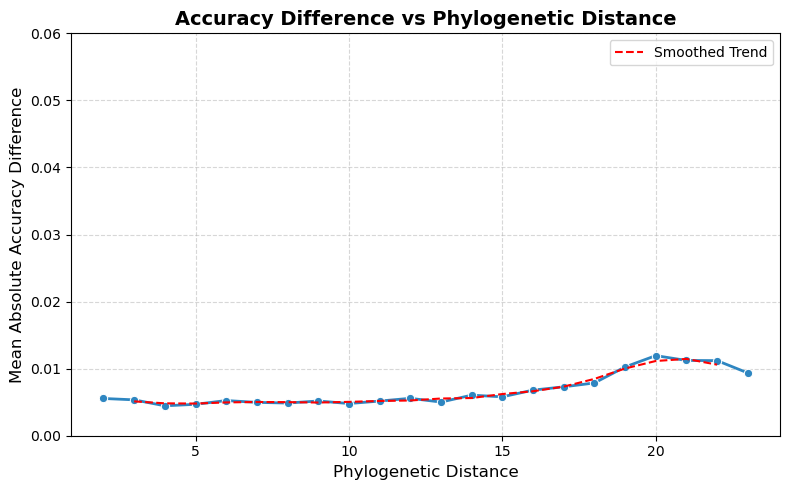

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort your merged DataFrame by phylogenetic distance
merged_sorted = merged.sort_values(by="distance")

# Compute average accuracy difference per distance value (in case there are duplicates)
avg_diff = merged_sorted.groupby("distance", as_index=False)["accuracy_diff"].mean()

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=avg_diff,
    x="distance",
    y="accuracy_diff",
    marker="o",
    color="#2E86C1",
    linewidth=2
)

# Optional: add a rolling mean for smoother trend
avg_diff["smooth"] = avg_diff["accuracy_diff"].rolling(window=3, center=True).mean()
sns.lineplot(
    data=avg_diff,
    x="distance",
    y="smooth",
    color="red",
    linestyle="--",
    label="Smoothed Trend"
)

# --- Labels and style ---
plt.title("Accuracy Difference vs Phylogenetic Distance", fontsize=14, weight='bold')
plt.xlabel("Phylogenetic Distance", fontsize=12)
plt.ylabel("Mean Absolute Accuracy Difference", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(0, 0.06)
plt.legend()
plt.tight_layout()

# --- Save high-quality figure ---
# plt.savefig(
#     "./accuracy_vs_distance_lineplot.png",
#     dpi=600,
#     bbox_inches="tight",
#     transparent=False
# )
plt.show()


In [25]:
import json
import os

os.makedirs("./results", exist_ok=True)
avg_diff["model"] = "MegaPlantTF"

output_path = "./results/megaPlantTF_phylo.json"
avg_diff.to_json(output_path, orient="records", indent=4)
avg_diff.to_csv("./results/megaPlantTF_phylo.csv", index=False)